In [453]:
#step1:importing important modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [466]:
#data profiling 
#step2:checking the data and removing unnecessary columns and then renaming them with suitable title
spam=pd.read_csv("E:\\Desktop\\spam.csv",encoding="latin1").rename(columns={"v1":"Message","v2":"Text"}).drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])


In [467]:
#step3:With LabelEncoder replacing ham and span with 0 & 1 and putting back array into the dataset
le=LabelEncoder()
spam["Message"]=le.fit_transform(spam["Message"])

In [468]:
#step4: Missing values in the data
spam.isnull().sum()

Message    0
Text       0
dtype: int64

In [469]:
#step5: duplicates in the data
spam.duplicated().sum()

403

In [470]:
#step6:dropping duplecat values from dataset
spam.drop_duplicates(keep="first",inplace=True)

In [471]:
#EDA
#step7:cheching ratio of ham & spam
spam["Message"].value_counts()

Message
0    4516
1     653
Name: count, dtype: int64

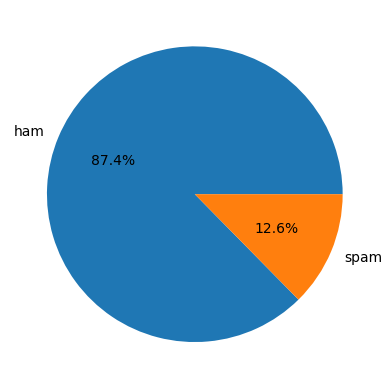

In [472]:
#step8:pie plot of ham & spam
plt.pie(spam["Message"].value_counts(),labels=["ham","spam"],autopct="%.1f%%")
plt.show()

In [473]:
#step9:downloading and importing NLTK
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

In [474]:
#step10:adding new columns text character,word count,sentances count
spam['Text_character']=spam['Text'].apply(lambda x:len(x))
spam["Word_count"]=spam["Text"].apply(lambda x:len(nltk.word_tokenize(x)))
spam['Sentances_count']=spam["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [475]:
#step11: describe new added columns
#describe ham
spam[spam["Message"]==0][["Text_character","Word_count","Sentances_count"]].describe()


,Text_character,Word_count,Sentances_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [476]:
#describe spam
spam[spam["Message"]==1][["Text_character","Word_count","Sentances_count"]].describe()

,Text_character,Word_count,Sentances_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


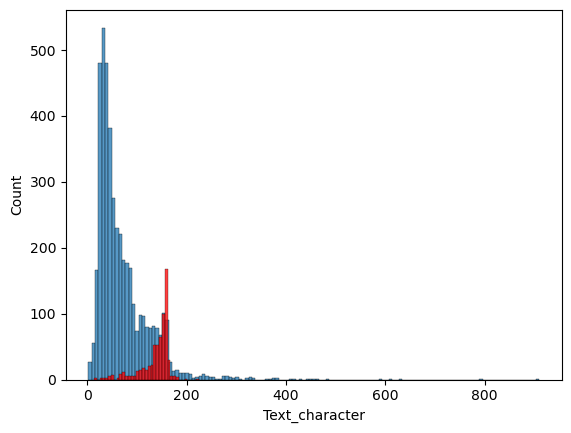

In [477]:
#step12: plotting histogram of ham and spam
sns.histplot(spam[spam["Message"]==0]["Text_character"])
sns.histplot(spam[spam["Message"]==1]["Text_character"],color="red")
plt.show()

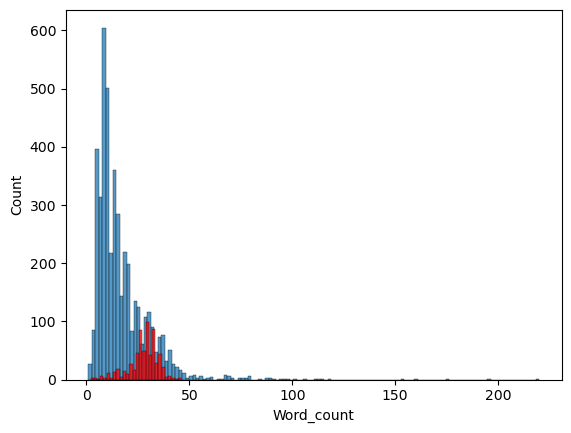

In [478]:
#step13: plotting histogram of ham and spam
sns.histplot(spam[spam["Message"]==0]["Word_count"])
sns.histplot(spam[spam["Message"]==1]["Word_count"],color="red")
plt.show()

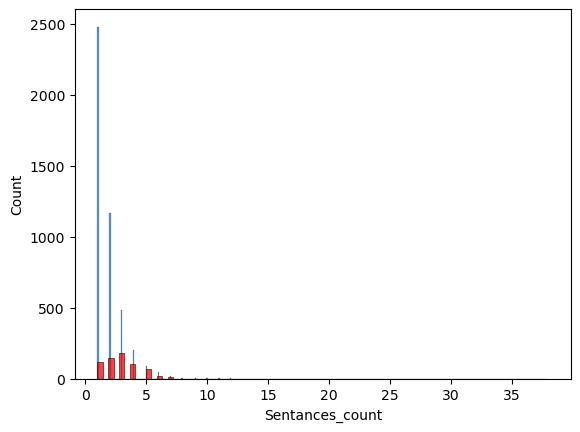

In [479]:
#step14: plotting histogram of ham and spam
sns.histplot(spam[spam["Message"]==0]["Sentances_count"])
sns.histplot(spam[spam["Message"]==1]["Sentances_count"],color="red")
plt.show()

C:\Users\HP\anaconda3\new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


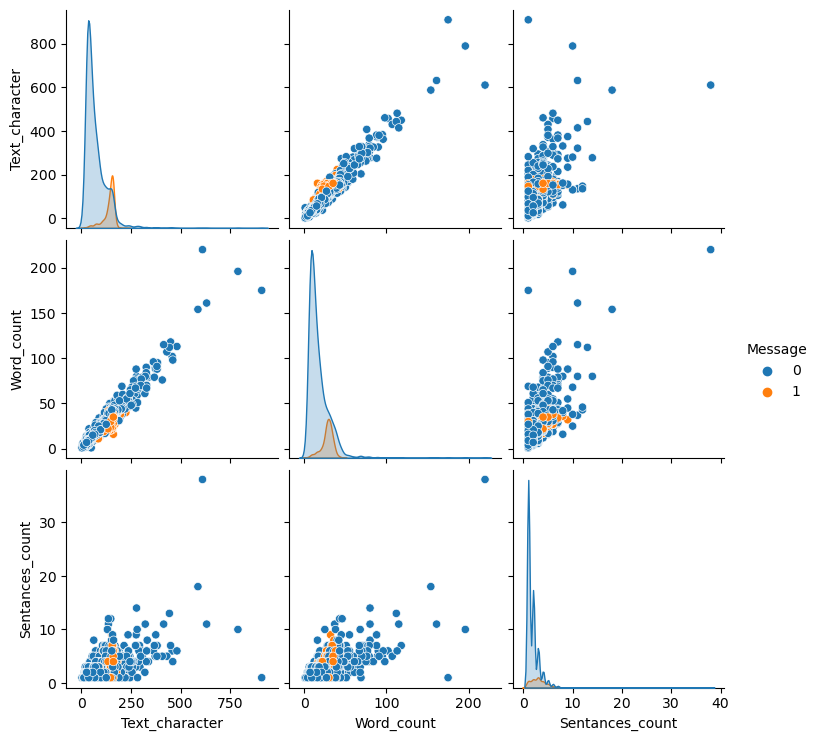

In [480]:
sns.pairplot(spam,hue="Message")

In [481]:
spam[["Text_character","Word_count","Sentances_count"]].corr()

,Text_character,Word_count,Sentances_count
Text_character,1.000000,0.965760,0.624139
Word_count,0.965760,1.000000,0.679971
Sentances_count,0.624139,0.679971,1.000000


<Axes: >

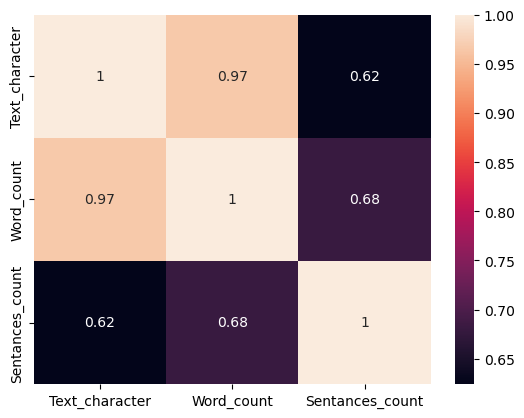

In [482]:
sns.heatmap(spam[["Text_character","Word_count","Sentances_count"]].corr(),annot=True)

In [483]:
#Data Preprocessing
#1.converting to lowercase
#2.removing special chracters and punctuation
#3.tokenizing
#4.stopwords
#5.steming

In [484]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()



In [485]:
spam["Text"].apply(lambda x:nltk.word_tokenize(x))
type(spam["Text"])


pandas.core.series.Series

In [486]:
#this programe remove stopwors and punctuation and convert text to it's root form
class Transformed_text:
    @staticmethod
    def data_processor(text):
        z=[]
        text=text.lower()
        text=nltk.word_tokenize(text)
        for x in text:
            if x not in stopwords.words("english") and x not in punctuation :
                z.append(x)
   
        text=z[:]
        z.clear()
        for x in text:
            x=ps.stem(x)
            z.append(x)
        return " ".join(z)

    
 


In [487]:
#appliying programe to data
spam["Text"]=spam["Text"].apply(data_processor)


In [488]:
spam=spam[["Message","Text"]]

In [489]:
# showing most common words in normal message and spam

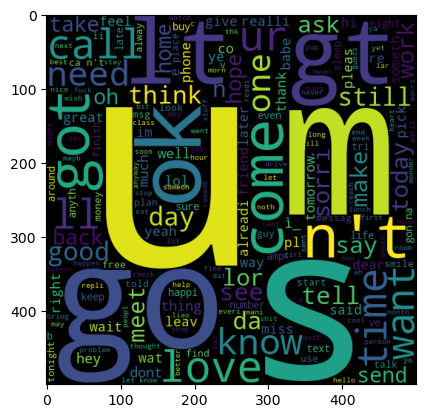

In [490]:
from wordcloud import WordCloud
wc=WordCloud(height=500,width=500,background_color="black",min_font_size=10)
word_cloud=wc.generate(spam[spam["Message"]==0]["Text"].str.cat(sep=" "))
plt.imshow(word_cloud)

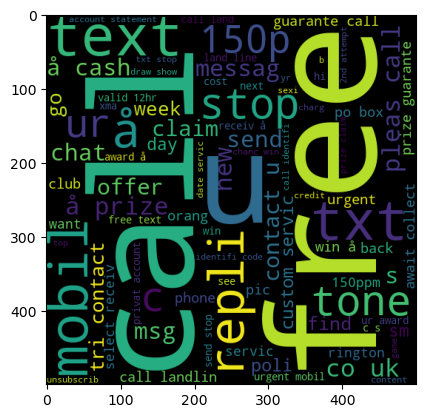

In [491]:
word_cloud=wc.generate(spam[spam["Message"]==1]["Text"].str.cat(sep=" "))
plt.imshow(word_cloud)

In [492]:
# finding top 30 most used words in normal and spam email
spam[spam["Message"]==1]["Text"]
list=[]
for x in spam[spam["Message"]==1]["Text"].tolist():
    for word in x.split(" "):
        list.append(word)
from collections import Counter
word_count=Counter(list).most_common(30)
wc_df=pd.DataFrame(word_count,columns=["word","count"])
wc_df

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [493]:
#convert email into bag of words for model building

In [494]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [495]:
bag_of_words = tfidf.fit_transform(spam['Text']).toarray()
bag_of_words.shape


(5169, 3000)

In [496]:
#importing reqired module for model building
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
X_train, X_test, y_train, y_test=train_test_split(bag_of_words,spam["Message"],test_size=.2,random_state=42)
X_train.shape

(4135, 3000)

In [530]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [531]:
gnb.fit(X_train,y_train)

GaussianNB()

In [499]:
# using gaussian naive bayes model to get expecyed output,accuracy,confusion matrix and precision score
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8665377176015474
[[776 113]
 [ 25 120]]
0.5150214592274678


In [532]:
# mulinomial naive bayes model to get expecyed output,accuracy,confusion matrix and precision score
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[888   1]
 [ 24 121]]
0.9918032786885246


In [501]:
# bernoulli naive bayes model to get expecyed output,accuracy,confusion matrix and precision score
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[886   3]
 [ 18 127]]
0.9769230769230769


In [502]:
!pip install xgboost

In [503]:
#importing diff modules to cross check all diff models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [504]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [505]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [506]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [507]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9621212121212122)

In [508]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9621212121212122
For  KN
Accuracy -  0.9032882011605415
Precision -  1.0
For  NB
Accuracy -  0.9758220502901354
Precision -  0.9918032786885246
For  DT
Accuracy -  0.9458413926499033
Precision -  0.8677685950413223
For  LR
Accuracy -  0.9593810444874274
Precision -  0.912
For  RF
Accuracy -  0.9806576402321083
Precision -  1.0
For  AdaBoost
Accuracy -  0.9748549323017408
Precision -  0.9343065693430657
For  BgC
Accuracy -  0.9748549323017408
Precision -  0.9343065693430657
For  ETC
Accuracy -  0.9825918762088974
Precision -  0.9922480620155039
For  GBDT
Accuracy -  0.9545454545454546
Precision -  0.9803921568627451
For  xgb
Accuracy -  0.9796905222437138
Precision -  0.9626865671641791


In [509]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [510]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.903288,1.000000
5,RF,0.980658,1.000000
8,ETC,0.982592,0.992248
2,NB,0.975822,0.991803
9,GBDT,0.954545,0.980392
10,xgb,0.979691,0.962687
0,SVC,0.977756,0.962121
6,AdaBoost,0.974855,0.934307
7,BgC,0.974855,0.934307
4,LR,0.959381,0.912000


In [511]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [512]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.903288
1,RF,Accuracy,0.980658
2,ETC,Accuracy,0.982592
3,NB,Accuracy,0.975822
4,GBDT,Accuracy,0.954545
5,xgb,Accuracy,0.979691
6,SVC,Accuracy,0.977756
7,AdaBoost,Accuracy,0.974855
8,BgC,Accuracy,0.974855
9,LR,Accuracy,0.959381


C:\Users\HP\anaconda3\new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


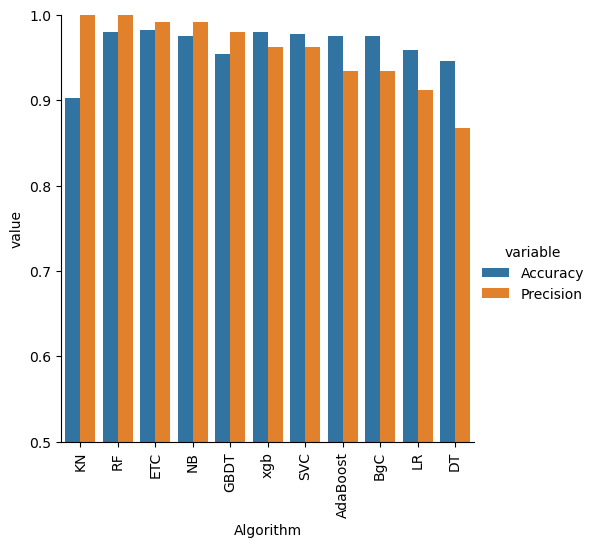

In [513]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [514]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.903288,1.000000
5,RF,0.980658,1.000000
8,ETC,0.982592,0.992248
2,NB,0.975822,0.991803
9,GBDT,0.954545,0.980392
10,xgb,0.979691,0.962687
0,SVC,0.977756,0.962121
6,AdaBoost,0.974855,0.934307
7,BgC,0.974855,0.934307
4,LR,0.959381,0.912000


In [515]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.903288,1.000000
5,RF,0.980658,1.000000
8,ETC,0.982592,0.992248
2,NB,0.975822,0.991803
9,GBDT,0.954545,0.980392
10,xgb,0.979691,0.962687
0,SVC,0.977756,0.962121
6,AdaBoost,0.974855,0.934307
7,BgC,0.974855,0.934307
4,LR,0.959381,0.912000


In [516]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.903288,1.000000,0.903288,1.000000
1,RF,0.980658,1.000000,0.980658,1.000000
2,ETC,0.982592,0.992248,0.982592,0.992248
3,NB,0.975822,0.991803,0.975822,0.991803
4,GBDT,0.954545,0.980392,0.954545,0.980392
5,xgb,0.979691,0.962687,0.979691,0.962687
6,SVC,0.977756,0.962121,0.977756,0.962121
7,AdaBoost,0.974855,0.934307,0.974855,0.934307
8,BgC,0.974855,0.934307,0.974855,0.934307
9,LR,0.959381,0.912000,0.959381,0.912000


In [517]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000
1,RF,0.980658,1.000000,0.980658,1.000000,0.980658,1.000000
2,ETC,0.982592,0.992248,0.982592,0.992248,0.982592,0.992248
3,NB,0.975822,0.991803,0.975822,0.991803,0.975822,0.991803
4,GBDT,0.954545,0.980392,0.954545,0.980392,0.954545,0.980392
5,xgb,0.979691,0.962687,0.979691,0.962687,0.979691,0.962687
6,SVC,0.977756,0.962121,0.977756,0.962121,0.977756,0.962121
7,AdaBoost,0.974855,0.934307,0.974855,0.934307,0.974855,0.934307
8,BgC,0.974855,0.934307,0.974855,0.934307,0.974855,0.934307
9,LR,0.959381,0.912000,0.959381,0.912000,0.959381,0.912000


In [518]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
temp_df

,Algorithm,Accuracy_num_chars,Precision_num_chars
1,KN,0.903288,1.000000
5,RF,0.980658,1.000000
8,ETC,0.982592,0.992248
2,NB,0.975822,0.991803
9,GBDT,0.954545,0.980392
10,xgb,0.979691,0.962687
0,SVC,0.977756,0.962121
6,AdaBoost,0.974855,0.934307
7,BgC,0.974855,0.934307
4,LR,0.959381,0.912000


In [519]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000
1,RF,0.980658,1.000000,0.980658,1.000000,0.980658,1.000000,0.980658,1.000000
2,ETC,0.982592,0.992248,0.982592,0.992248,0.982592,0.992248,0.982592,0.992248
3,NB,0.975822,0.991803,0.975822,0.991803,0.975822,0.991803,0.975822,0.991803
4,GBDT,0.954545,0.980392,0.954545,0.980392,0.954545,0.980392,0.954545,0.980392
5,xgb,0.979691,0.962687,0.979691,0.962687,0.979691,0.962687,0.979691,0.962687
6,SVC,0.977756,0.962121,0.977756,0.962121,0.977756,0.962121,0.977756,0.962121
7,AdaBoost,0.974855,0.934307,0.974855,0.934307,0.974855,0.934307,0.974855,0.934307
8,BgC,0.974855,0.934307,0.974855,0.934307,0.974855,0.934307,0.974855,0.934307
9,LR,0.959381,0.912000,0.959381,0.912000,0.959381,0.912000,0.959381,0.912000


In [520]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [521]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [522]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [523]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 1.0


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [524]:
from sklearn.ensemble import StackingClassifier

In [525]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [526]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 0.9710144927536232


In [533]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(mnb,open('model11.pkl','wb'))
